<a href="https://colab.research.google.com/github/manuelfernandezdm/pyspark/blob/main/pyspark_listenings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Notebook**

### Let's mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 :
Installing pyspark module

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 23.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=8203d1f056d843ee6bca54525edc4100ecd129f799a1a7b6b24e3ee8820e1ebc
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


Importing the modules

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max , struct
import matplotlib.pyplot as plts

creating spark session

In [ ]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 :
importing the *Listenings.csv* file:

In [ ]:
listening_csv_path = '/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)

let's check the data:

In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [ ]:
listening_df = listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema:

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe:

In [ ]:
shape = (listening_df.count(),len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
query = listening_df.select('track', 'artist')
query.show()

+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listening_df.select('*').filter(listening_df.artist=='Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
query_2 = listening_df.select('user_id').filter(listening_df.artist=='Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
query_2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks

In [ ]:
query_3 = listening_df.select('artist', 'track').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
query_3.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [ ]:
query_4 = listening_df.select('artist', 'track').filter(listening_df.artist=='Rihanna').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count'))
query_4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
|Rihanna|           Desperado|  679|
|Rihanna|           Disturbia|  667|
|Rihanna|   Work (feat Drake)|  662|
|Rihanna|     What's My Name?|  657|
|Rihanna| California King Bed|  639|
|Rihanna|            Man Down|  636|
|Rihanna|Bitch Better Have...|  565|
|Rihanna|    Russian Roulette|  564|
|Rihanna|              Te Amo|  558|
|Rihanna|            Umbrella|  552|
+-------+--------------------+-----+
only showing top 20 rows



**Query #5:**

find top 10 famous albums

In [ ]:
query_5 = listening_df.select('album').groupby('album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
query_5.show()

+--------------------+-----+
|               album|count|
+--------------------+-----+
|       Greatest Hits|67892|
|   The Life Of Pablo|22311|
|                  AM|14264|
|                  xx|14198|
|     An Awesome Wave|13673|
|        Sigh No More|13556|
|Whatever People S...|12731|
|            For Emma|11995|
|          Art Angels|11694|
|                  21|11576|
+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
genre_csv_path = '/content/drive/MyDrive/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchemae', True).option('header', True).load(genre_csv_path
                                                                                   )

let's check the data

In [ ]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [ ]:
data = listening_df.join(genre_df, how ='inner', on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

Let's inner join these two data frames

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
query_6 = data.select('user_id').filter(data.genre =='pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
query_6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
query_7 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
query_7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
query_8 = data.select('user_id','genre').groupby('user_id','genre').agg(count('*').alias('count')).orderBy('user_id')
query_8.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|               Bjorn|    8|
| --Seph| brazilian pop music|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|        instrumental|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|               samba|    2|
| --Seph|             ambient|    6|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|             baroque|    1|
| --Seph|     Hilko Schomerus|    1|
| --Seph|      Kendrick Lamar|    4|
| --Seph|             hip hop|    7|
| --Seph|          electronic|    6|
| --Seph|                rock|   27|
| --Seph| London Symphony ...|    1|
| --Seph|                fado|    1|
| --Seph|          soundtrack|    1|
| --Seph|              techno|    3|
| --Seph|          french pop|    1|
| --Seph|      Alice Sara Ott|    2|
+-------+--------------------+-----+
only showing top 20 rows



In [ ]:
query_8_2 = query_8.groupby('user_id').agg(max(struct(col('count'), col('genre'))).alias('max')).select(col('user_id'), col('max.genre'))
query_8_2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart

In [ ]:
query_9 = genre_df.select('genre').filter((col('genre')=='pop')|(col('genre')=='rock')|(col('genre')=='metal')|(col('genre')=='hip hop')).groupby('genre').agg(count('genre').alias('count'))
query_9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [ ]:
q9_list = query_9.collect()

In [ ]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [ ]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

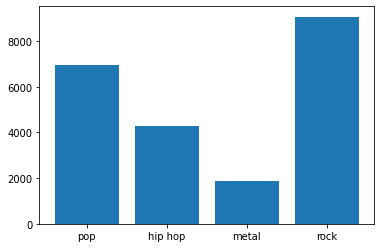

In [ ]:
plts.bar(labels, counts)